In [92]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("../../Data/german_credit_data.csv", index_col=0)
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [93]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [94]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [95]:
df_credit.isnull().sum()/len(df_credit)

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [96]:
#Looking unique values
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Risk', ylabel='count'>

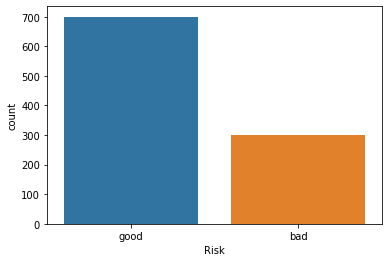

In [97]:
sns.countplot(df_credit['Risk'])

<AxesSubplot:xlabel='Risk', ylabel='count'>

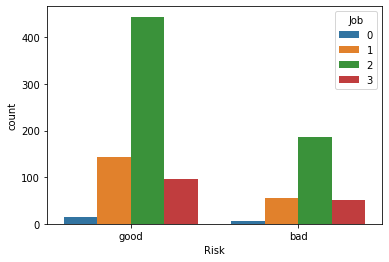

In [98]:
sns.countplot(x='Risk', hue='Job', data=df_credit)

<AxesSubplot:xlabel='Sex', ylabel='count'>

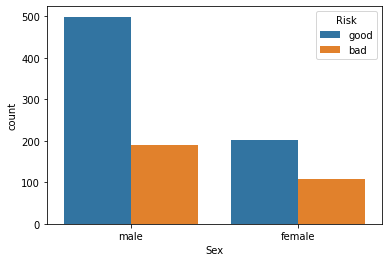

In [99]:
sns.countplot(x='Sex', hue='Risk', data=df_credit)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Age'>

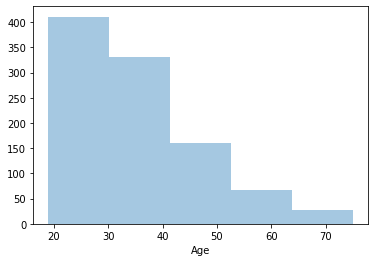

In [100]:
sns.distplot(df_credit['Age'],bins=5,kde=False)

<AxesSubplot:xlabel='Age'>

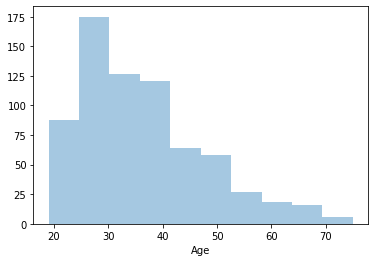

In [101]:
sns.distplot(df_credit[df_credit['Risk']=='good']['Age'], bins=10, kde=False)

<AxesSubplot:xlabel='Age'>

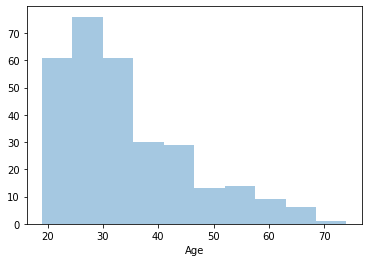

In [102]:
sns.distplot(df_credit[df_credit['Risk']=='bad']['Age'], bins=10, kde=False)

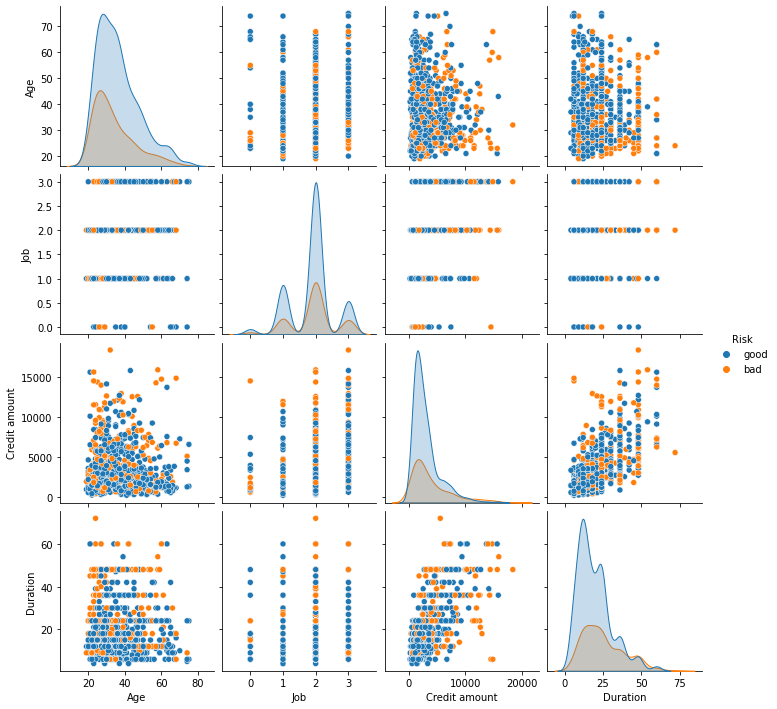

In [103]:
sns.pairplot(df_credit,hue='Risk')

In [104]:
df_credit.fillna('Missing', inplace=True)
df_credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own         Missing           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little          Missing           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [105]:
df_credit['Job'] = df_credit['Job'].astype('category')

In [106]:
df_credit_dummy = pd.get_dummies(df_credit, drop_first = True)
df_credit_dummy.head()

Age  Credit amount  Duration  Sex_male  Job_1  Job_2  Job_3  Housing_own  \
0   67           1169         6         1      0      1      0            1   
1   22           5951        48         0      0      1      0            1   
2   49           2096        12         1      1      0      0            1   
3   45           7882        42         1      0      1      0            0   
4   53           4870        24         1      0      1      0            0   

   Housing_rent  Saving accounts_little  ...  Checking account_moderate  \
0             0                       0  ...                          0   
1             0                       1  ...                          1   
2             0                       1  ...                          0   
3             0                       1  ...                          0   
4             0                       1  ...                          0   

   Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                      0            0                            0   
1                      0            0                            0   
2                      0            0                            0   
3                      0            0                            0   
4                      0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  Risk_good  
0                0                        0          1  
1                0                        0          0  
2                0                        0          1  
3                0                        0          1  
4                0                        0          0  

[5 rows x 24 columns]

In [107]:
X = df_credit_dummy.drop('Risk_good',axis=1)
y = df_credit_dummy['Risk_good']

In [108]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [110]:
log = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
log.fit(X_train, y_train)
dt = DecisionTreeClassifier(max_depth = 50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
y_pred_log = log.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [ ]:
print (accuracy_score(y_test,y_pred_log))
print (confusion_matrix(y_test, y_pred_log))
print (classification_report(y_test, y_pred_log))

In [ ]:
print (accuracy_score(y_test,y_pred_dt))
print (confusion_matrix(y_test, y_pred_dt))
print (classification_report(y_test, y_pred_dt))

In [ ]:
param_grid = { "max_depth" : [3,5,7,9,11,13,15,17,19,21],
              "max_features" : [2,4,6,8,10]}

model = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(model, param_grid = param_grid, cv = 5 )

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth= 7, max_features= 2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print (accuracy_score(y_test,y_pred_rf))
print (confusion_matrix(y_test, y_pred_rf))
print (classification_report(y_test, y_pred_rf))

In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Fairness

In [4]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [5]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [6]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [111]:
df_credit_dummy

Age  Credit amount  Duration  Sex_male  Job_1  Job_2  Job_3  Housing_own  \
0     67           1169         6         1      0      1      0            1   
1     22           5951        48         0      0      1      0            1   
2     49           2096        12         1      1      0      0            1   
3     45           7882        42         1      0      1      0            0   
4     53           4870        24         1      0      1      0            0   
..   ...            ...       ...       ...    ...    ...    ...          ...   
995   31           1736        12         0      1      0      0            1   
996   40           3857        30         1      0      0      1            1   
997   38            804        12         1      0      1      0            1   
998   23           1845        45         1      0      1      0            0   
999   27           4576        45         1      0      1      0            1   

     Housing_rent  Saving accounts_little  ...  Checking account_moderate  \
0               0                       0  ...                          0   
1               0                       1  ...                          1   
2               0                       1  ...                          0   
3               0                       1  ...                          0   
4               0                       1  ...                          0   
..            ...                     ...  ...                        ...   
995             0                       1  ...                          0   
996             0                       1  ...                          0   
997             0                       1  ...                          0   
998             0                       1  ...                          0   
999             0                       0  ...                          1   

     Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                        0            0                            0   
1                        0            0                            0   
2                        0            0                            0   
3                        0            0                            0   
4                        0            1                            0   
..                     ...          ...                          ...   
995                      0            0                            0   
996                      0            1                            0   
997                      0            0                            0   
998                      0            0                            0   
999                      0            1                            0   

     Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                    0                            0                 1   
1                    0                            0                 1   
2                    1                            0                 0   
3                    0                            1                 0   
4                    0                            0                 0   
..                 ...                          ...               ...   
995                  0                            1                 0   
996                  0                            0                 0   
997                  0                            0                 1   
998                  0                            0                 1   
999                  0                            0                 0   

     Purpose_repairs  Purpose_vacation/others  Risk_good  
0                  0                        0          1  
1                  0                        0          0  
2                  0                        0          1  
3                  0                        0          1  
4                  0                        0          0  
..         

In [112]:
from scipy.stats import pearsonr

pearsonr(df_credit_dummy['Risk_good'], df_credit_dummy['Sex_male'])

(0.07549269735627595, 0.016953676392236626)

In [90]:
pd.DataFrame(X_train).iloc[diff_list]

0        1     2    3    4    5    6    7    8    9   ...   13   14  \
0    33.0   4439.0  18.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  1.0   
5    27.0   1449.0   9.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
15   47.0   3578.0  48.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
18   25.0   1295.0  12.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  ...  0.0  1.0   
59   34.0   2320.0  18.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
63   33.0   1927.0  24.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
65   40.0   1977.0  36.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0   
94   43.0   4042.0  24.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
98   27.0   8613.0  27.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
105  47.0   1217.0  18.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
108  26.0   1382.0  24.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  0.0   
110  61.0   2767.0  21.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
116  39.0   1188.0  21.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
129  32.0   2848.0  10.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
137  25.0  14421.0  48.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
138  26.0   5433.0  24.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0   
144  60.0   1199.0  24.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
151  63.0    781.0  10.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
152  31.0   1963.0  12.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  ...  0.0  0.0   
162  36.0   1278.0  24.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  0.0   
166  29.0   5179.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
187  42.0  10366.0  60.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  0.0   
190  23.0   3573.0  12.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
199  32.0   2273.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
202  44.0   6204.0  18.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
213  52.0    717.0  12.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
230  43.0   2442.0  27.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  1.0  0.0   
231  52.0   6468.0  12.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  1.0   
263  23.0  14555.0   6.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   
279  37.0   3535.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
287  25.0   2210.0  10.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0   

      15   16   17   18   19   20   21   22  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
18   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
59   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
63   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
65   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
94   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
98   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
105  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
108  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
110  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
129  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
138  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
144  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
151  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
152  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
162  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
166  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
187  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
190  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
199  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
202  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
213  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
230  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
231  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
263  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
279  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
287  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[31 rows x 23 columns]

In [29]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'Sex_male': 1}]
unprivileged_groups = [{'Sex_male': 0}]
dataset_orig = StandardDataset(df_credit_dummy,
                                  label_name='Risk_good',
                                  protected_attribute_names=['Sex_male'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [30]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.074801


In [88]:
data_orig_train = pd.read_pickle('../../Results/XGBoost/7-predicting-credit-risk-model-pipeline-60deb1_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/XGBoost/7-predicting-credit-risk-model-pipeline-60deb1_Test.pkl')

In [89]:
import ipynbname
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

#data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = XGBClassifier(n_estimators = 1)

mdl = model.fit(X_train, y_train)
yy = mdl.predict(X_test)

#with open('../../Results/XGBoost/' + nb_fname + '.pkl', 'wb') as f:
#    pickle.dump(mdl, f)

#with open('../../Results/XGBoost/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_train, f) 
    
#with open('../../Results/XGBoost/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_test, f) 

In [35]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = XGBClassifier(n_estimators= i)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)
    if i == 14:
        moti = yy
        #print(accuracy_score(y_test, yy))
        
    if i == 100:
        moti_2 = yy
        print(accuracy_score(y_test, yy))


0.74


In [13]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/XGBoost/' + nb_fname + '.csv')
final_result

           0         1         2         3         4
0  -0.100125 -0.100455  0.054015  0.870645  0.203323
1  -0.072115 -0.058392  0.029196  0.912281  0.159166
2  -0.089047 -0.047540  0.046497  0.891049  0.148647
3  -0.115594 -0.042786  0.078211  0.859395  0.134742
4  -0.117893 -0.094977  0.066428  0.860672  0.134741
..       ...       ...       ...       ...       ...
95 -0.150711 -0.073998  0.131696  0.812288  0.173722
96 -0.161580 -0.073998  0.146847  0.798750  0.173059
97 -0.150711 -0.057048  0.138373  0.812288  0.169162
98 -0.145903 -0.050951  0.135324  0.817182  0.173059
99 -0.156773 -0.067900  0.143798  0.803562  0.176971

[100 rows x 5 columns]


classifier        T0        T1        T2  \
accuracy                         0.740000  0.706667  0.730000  0.753333   
f1                               0.825893  0.802691  0.825054  0.839130   
statistical_parity_difference   -0.156773 -0.100125 -0.072115 -0.089047   
equal_opportunity_difference    -0.067900 -0.100455 -0.058392 -0.047540   
average_abs_odds_difference      0.143798  0.054015  0.029196  0.046497   
disparate_impact                -0.218701 -0.138520 -0.091808 -0.115356   
theil_index                      0.176971  0.203323  0.159166  0.148647   

                                     T3        T4        T5        T6  \
accuracy                       0.776667  0.760000  0.766667  0.760000   
f1                             0.854031  0.845494  0.849138  0.845494   
statistical_parity_difference -0.115594 -0.117893 -0.123955 -0.117893   
equal_opportunity_difference  -0.042786 -0.094977 -0.071931 -0.071931   
average_abs_odds_difference    0.078211  0.066428  0.085208  0.081420   
disparate_impact              -0.151527 -0.150042 -0.159382 -0.150042   
theil_index                    0.134742  0.134741  0.133545  0.134741   

                                     T7        T8  ...       T90       T91  \
accuracy                       0.770000  0.773333  ...  0.746667  0.743333   
f1                             0.852248  0.854077  ...  0.831111  0.829268   
statistical_parity_difference -0.138378 -0.133570  ... -0.150711 -0.139841   
equal_opportunity_difference  -0.084126 -0.061079  ... -0.057048 -0.057048   
average_abs_odds_difference    0.102669  0.106297  ...  0.138373  0.123221   
disparate_impact              -0.176379 -0.170745  ... -0.207900 -0.191370   
theil_index                    0.126682  0.126077  ...  0.169162  0.169825   

                                    T92       T93       T94       T95  \
accuracy                       0.740000  0.743333  0.740000  0.740000   
f1                             0.826667  0.829268  0.826667  0.826667   
statistical_parity_difference -0.135033 -0.139841 -0.150711 -0.150711   
equal_opportunity_difference  -0.050951 -0.057048 -0.073998 -0.073998   
average_abs_odds_difference    0.120172  0.123221  0.131696  0.131696   
disparate_impact              -0.185364 -0.191370 -0.207900 -0.207900   
theil_index                    0.173722  0.169825  0.173722  0.173722   

                                    T96       T97       T98       T99  
accuracy                       0.743333  0.746667  0.743333  0.740000  
f1                             0.828508  0.831111  0.828508  0.825893  
statistical_parity_difference -0.161580 -0.150711 -0.145903 -0.156773  
equal_opportunity_difference  -0.073998 -0.057048 -0.050951 -0.067900  
average_abs_odds_difference    0.146847  0.138373  0.135324  0.143798  
disparate_impact              -0.224707 -0.207900 -0.201894 -0.218701  
theil_index                    0.173059  0.169162  0.173059  0.176971  

[7 rows x 101 columns]

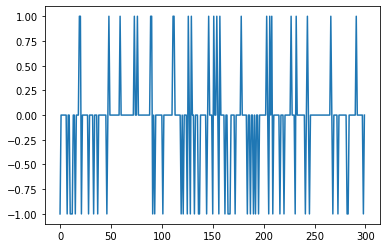

In [59]:
residual_13 = y_test - moti
import matplotlib.pyplot as plt

plt.plot(residual_13)

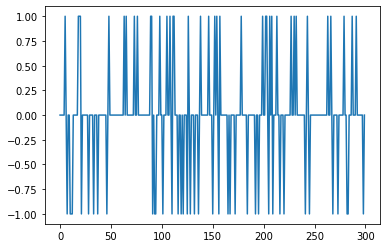

In [51]:
residual_final = y_test - moti_2
import matplotlib.pyplot as plt

plt.plot(residual_final)

In [63]:
same = 0
diff = 0
total = 0
diff_list = []
for x, y in zip(residual_13, residual_final):
    if x == y:
        same = same +1
    else:
        diff = diff + 1
        diff_list.append(total)
    total = total + 1

print(same,diff)
print(diff_list)

269 31
[0, 5, 15, 18, 59, 63, 65, 94, 98, 105, 108, 110, 116, 129, 137, 138, 144, 151, 152, 162, 166, 187, 190, 199, 202, 213, 230, 231, 263, 279, 287]


In [66]:
pd.DataFrame(X_train).iloc[diff_list]

0        1     2    3    4    5    6    7    8    9   ...   13   14  \
0    33.0   4439.0  18.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  1.0   
5    27.0   1449.0   9.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
15   47.0   3578.0  48.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
18   25.0   1295.0  12.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  ...  0.0  1.0   
59   34.0   2320.0  18.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
63   33.0   1927.0  24.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
65   40.0   1977.0  36.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0   
94   43.0   4042.0  24.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
98   27.0   8613.0  27.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
105  47.0   1217.0  18.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
108  26.0   1382.0  24.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  0.0   
110  61.0   2767.0  21.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
116  39.0   1188.0  21.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
129  32.0   2848.0  10.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
137  25.0  14421.0  48.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
138  26.0   5433.0  24.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0   
144  60.0   1199.0  24.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
151  63.0    781.0  10.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
152  31.0   1963.0  12.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  ...  0.0  0.0   
162  36.0   1278.0  24.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  0.0   
166  29.0   5179.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   
187  42.0  10366.0  60.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0  0.0   
190  23.0   3573.0  12.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
199  32.0   2273.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
202  44.0   6204.0  18.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   
213  52.0    717.0  12.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
230  43.0   2442.0  27.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  1.0  0.0   
231  52.0   6468.0  12.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  1.0   
263  23.0  14555.0   6.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   
279  37.0   3535.0  36.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
287  25.0   2210.0  10.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0   

      15   16   17   18   19   20   21   22  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
18   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
59   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
63   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
65   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
94   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
98   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
105  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
108  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
110  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
129  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
137  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
138  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
144  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
151  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
152  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
162  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
166  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
187  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
190  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
199  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
202  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
213  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
230  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
231  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
263  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
279  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
287  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[31 rows x 23 columns]

<AxesSubplot:>

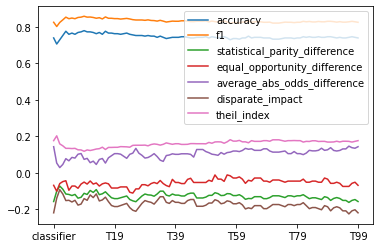

In [91]:
final_result.T.plot()